In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(2,0,0)loss0-1-0delay500bw100 (avg).json', 'r') as file:
    json_data_data_0 = json.load(file)

# Convert JSON data to DataFrame
df_data_0 = pd.DataFrame(json_data_data_0)

In [3]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(1,0,0)loss0-1-0delay500bw100 (avg).json', 'r') as file:
    json_data_data_1 = json.load(file)

# Convert JSON data to DataFrame
df_data_1 = pd.DataFrame(json_data_data_1)

In [4]:
# Open the JSON file
with open('average_data/res1080fps30bit6gop(0.5,0,0)loss0-1-0delay500bw100 (avg).json', 'r') as file:
    json_data_data_2 = json.load(file)

# Convert JSON data to DataFrame
df_data_2 = pd.DataFrame(json_data_data_2)

In [5]:
# Extract the continuous data
timestamps_0 = df_data_0['_1_rawVideoTimestamp']
timestamps_1 = df_data_1['_1_rawVideoTimestamp']
timestamps_2 = df_data_2['_1_rawVideoTimestamp']

total_time_0 = df_data_0['_8_totalTime']
total_time_1 = df_data_1['_8_totalTime']
total_time_2 = df_data_2['_8_totalTime']

# Extract the first index values for the other metrics
metrics = ['avg_total_frames', 'avg_received_frames', 'avg_rendered_frames', 
           'avg_percentage_received_frames', 'avg_skipped_frames', 'avg_render_time_difference', 
           'avg_render_time_difference_key_frame_preceding', 'avg_render_time_difference_key_frame_consecutive',
           'avg_num_of_stall_events', 'avg_stall_duration', 'avg_stall_duration_key_frame_preceding',
           'avg_stall_duration_key_frame_consecutive', 'avg_i_frames', 'avg_rendered_i_frames', 'avg_gop_size_frames', 
           'avg_gop_size_time', 'avg_total_time', 'avg_25th_percentile_total_time', 
           'avg_50th_percentile_total_time', 'avg_75th_percentile_total_time', 'avg_std_dev_total_time', 
           'avg_encoding_time', 'avg_propagation_time', 'avg_decoding_time', 'avg_received_bitrate', 
           'avg_fps']

# Initialize dictionary to store metric values
metric_values = {metric: [] for metric in metrics}

# Extract values for each dataframe
for df in [df_data_0, df_data_2]:
    for metric in metrics:
        metric_values[metric].append(df[metric].iloc[0])

# Metrics Comparison
print("\n=== Metrics Comparison ===")
for metric in metrics:
    values = metric_values[metric]
    print("{}: {:.2f} vs {:.2f}".format(
        metric, values[0], values[1]
    ))


=== Metrics Comparison ===
avg_total_frames: 1800.00 vs 1800.00
avg_received_frames: 1766.00 vs 1689.00
avg_rendered_frames: 1760.67 vs 1674.00
avg_percentage_received_frames: 98.11 vs 93.83
avg_skipped_frames: 39.33 vs 126.00
avg_render_time_difference: 34.08 vs 35.85
avg_render_time_difference_key_frame_preceding: 78.54 vs 92.15
avg_render_time_difference_key_frame_consecutive: 21.63 vs 27.72
avg_num_of_stall_events: 285.67 vs 415.33
avg_stall_duration: 10397.00 vs 8923.33
avg_stall_duration_key_frame_preceding: 1310.00 vs 6446.33
avg_stall_duration_key_frame_consecutive: 16.00 vs 642.00
avg_i_frames: 29.00 vs 112.00
avg_rendered_i_frames: 29.00 vs 111.33
avg_gop_size_frames: 61.07 vs 15.07
avg_gop_size_time: 2.07 vs 0.54
avg_total_time: 598.55 vs 567.57
avg_25th_percentile_total_time: 553.33 vs 551.67
avg_50th_percentile_total_time: 557.33 vs 555.83
avg_75th_percentile_total_time: 564.67 vs 563.00
avg_std_dev_total_time: 116.08 vs 51.90
avg_encoding_time: 44.22 vs 45.42
avg_propaga

In [6]:
pd.options.display.float_format = '{:.2f}'.format
table_data = {
    '2 s': [
        df_data_0['avg_rendered_frames'].iloc[0]/df_data_0['avg_total_frames'].iloc[0] * 100,
        df_data_0['avg_skipped_frames'].iloc[0],
        df_data_0['avg_stall_duration'].iloc[0],
        df_data_0['avg_gop_size_time'].iloc[0],
        df_data_0['avg_total_time'].iloc[0]
    ],
    '1 s': [
        df_data_1['avg_rendered_frames'].iloc[0]/df_data_1['avg_total_frames'].iloc[0] * 100,
        df_data_1['avg_skipped_frames'].iloc[0],
        df_data_1['avg_stall_duration'].iloc[0],
        df_data_1['avg_gop_size_time'].iloc[0],
        df_data_1['avg_total_time'].iloc[0]
    ],
    '0.5 s': [
        df_data_2['avg_rendered_frames'].iloc[0]/df_data_2['avg_total_frames'].iloc[0] * 100,
        df_data_2['avg_skipped_frames'].iloc[0],
        df_data_2['avg_stall_duration'].iloc[0],
        df_data_2['avg_gop_size_time'].iloc[0],
        df_data_2['avg_total_time'].iloc[0]
    ],
}
row_labels = ['Frame Render Rate (%)', 'Number of Skipped Frames', 'Stall Duration (ms)', 'GoP Size (s)', 'Average Latency (ms)']
table = pd.DataFrame(table_data, index=row_labels)
table


,2 s,1 s,0.5 s
Frame Render Rate (%),97.81,94.96,93.00
Number of Skipped Frames,39.33,90.67,126.00
Stall Duration (ms),10397.00,11862.00,8923.33
GoP Size (s),2.07,1.03,0.54
Average Latency (ms),598.55,599.22,567.57


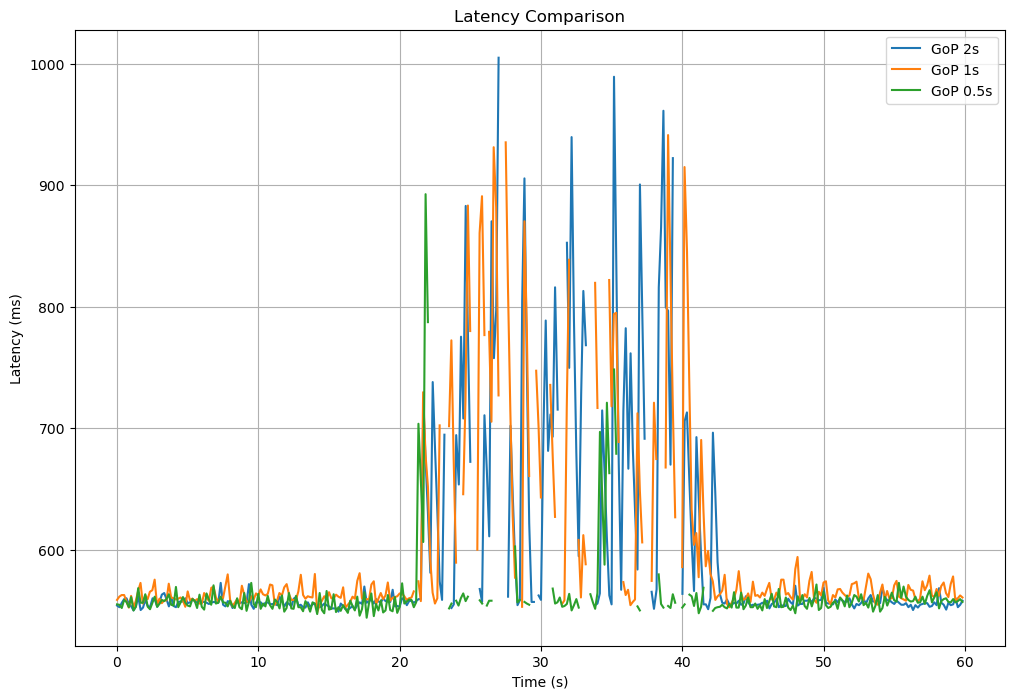

In [8]:
# Function to sample and smooth the data
def sample_and_smooth(data, timestamp_col, value_col, sample_rate=1, window_size=30):
    # Sampling
    sampled_data = data.iloc[::sample_rate, :]
    
    # Smoothing using a rolling window
    smoothed_values = sampled_data[value_col].rolling(window=window_size).mean()
    
    return sampled_data[timestamp_col], smoothed_values

# Sampling rate and window size for smoothing
sample_rate = 5  # Take every 30th frame
window_size = 1  # Rolling window size for smoothing

# Plotting
plt.figure(figsize=(12, 8))

# Sample and smooth data for each scenario
timestamps_0, smoothed_0 = sample_and_smooth(df_data_0, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_1, smoothed_1 = sample_and_smooth(df_data_1, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_2, smoothed_2 = sample_and_smooth(df_data_2, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)

# Plotting the smoothed data
plt.plot(timestamps_0, smoothed_0, label='GoP 2s')
plt.plot(timestamps_1, smoothed_1, label='GoP 1s')
plt.plot(timestamps_2, smoothed_2, label='GoP 0.5s')

# Adding labels, grid, and legend
plt.xlabel('Time (s)')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.legend()
plt.title('Latency Comparison')
plt.show()
